In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json

In [16]:
p1=['scratch_cp_0.json','scratch_cp_3400.json','scratch_cp_3437.json']

In [23]:
d_list=[]
for p in p1:
    with open('../data/disk1/'+p) as f:
        d1=json.load(f)
    print(len(d1['predict']))
    d_list.extend(d1['predict'])

3400
36
338


In [33]:
name=[]
num=[]
parts=[]
for i in d_list:
    name.append(i['image_name'])
    parts.append(str(list(i['damages'].keys())))
    num.append(len(i['damages'].keys()))

In [37]:
dent_out=pd.DataFrame([name,parts,num], index=['name', 'parts', 'num']).T

In [43]:
dent_out.to_csv('scratch_out.csv')

In [45]:
#read car-parts data
df_car=pd.read_csv('scratch_out.csv')
df_car=df_car.drop(df_car.columns[0], axis=1)
#read dent prediction data
df_dent=pd.read_csv('scratch_data_out.csv')

In [48]:
df_car=df_car.rename(columns={"name": "image_name"})

In [52]:
print(len(df_car))
print(len(df_dent))

3774
3775


In [49]:
df_car.head()

,image_name,parts,num
0,https:__s3.amazonaws.com_mc-imt_vehicle_2018X6...,['door'],1
1,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,"['hli_head_light', 'grille', 'tyre', 'window',...",21
2,https:__s3.amazonaws.com_mc-ai_dataset_KBC_unz...,['door'],1
3,https:__s3.amazonaws.com_mc-imt_vehicle_2019Y4...,"['tyre', 'hli_head_light', 'alloy_wheel', 'hoo...",10
4,https:__s3.amazonaws.com_mc-imt_vehicle_2019Z1...,"['rbu_rear_bumper', 'qpa_quarter_panel']",2


In [50]:
df_dent.head()

,image_name,image_id,annotated_poly,predicted_poly,fp_check,tp,fp,fn
0,https:__s3.amazonaws.com_mc-imt_vehicle_2018X6...,3101,"[[0, 264.75329993049723, 65.23146581435134, 48...","[[[(1, 260), (69, 313)], [(6, 8), (171, 49)], ...",0,3,0,1
1,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,17321,"[[587.1805758808483, 541.5151304800908, 43.576...","[[[(586, 540), (630, 555)], [(728, 607), (745,...",1,3,1,5
2,https:__s3.amazonaws.com_mc-ai_dataset_KBC_unz...,8787,"[[1143.3054495177678, 487.5918361869106, 130.2...","[[[(1137, 476), (1280, 659)], [(1504, 377), (1...",0,2,0,3
3,https:__s3.amazonaws.com_mc-imt_vehicle_2019Y4...,4063,"[[469.88512086957803, 400.5933058104699, 19.48...",[],0,0,0,1
4,https:__s3.amazonaws.com_mc-imt_vehicle_2019Z1...,7463,"[[295.5080142065347, 215.4440509350271, 15.278...","[[[(180, 248), (286, 291)], [(45, 92), (90, 11...",1,4,4,0


In [102]:
#df = pd.concat([df_car, df_dent], axis=1, sort=False)

In [53]:
df=pd.merge(df_car, df_dent,on='image_name', how='inner')

In [54]:
print(len(df))

3774


In [55]:
df.head(10)

,image_name,parts,num,image_id,annotated_poly,predicted_poly,fp_check,tp,fp,fn
0,https:__s3.amazonaws.com_mc-imt_vehicle_2018X6...,['door'],1,3101,"[[0, 264.75329993049723, 65.23146581435134, 48...","[[[(1, 260), (69, 313)], [(6, 8), (171, 49)], ...",0,3,0,1
1,https:__s3.amazonaws.com_mc-ai_dataset_india_2...,"['hli_head_light', 'grille', 'tyre', 'window',...",21,17321,"[[587.1805758808483, 541.5151304800908, 43.576...","[[[(586, 540), (630, 555)], [(728, 607), (745,...",1,3,1,5
2,https:__s3.amazonaws.com_mc-ai_dataset_KBC_unz...,['door'],1,8787,"[[1143.3054495177678, 487.5918361869106, 130.2...","[[[(1137, 476), (1280, 659)], [(1504, 377), (1...",0,2,0,3
3,https:__s3.amazonaws.com_mc-imt_vehicle_2019Y4...,"['tyre', 'hli_head_light', 'alloy_wheel', 'hoo...",10,4063,"[[469.88512086957803, 400.5933058104699, 19.48...",[],0,0,0,1
4,https:__s3.amazonaws.com_mc-imt_vehicle_2019Z1...,"['rbu_rear_bumper', 'qpa_quarter_panel']",2,7463,"[[295.5080142065347, 215.4440509350271, 15.278...","[[[(180, 248), (286, 291)], [(45, 92), (90, 11...",1,4,4,0
5,https:__s3.amazonaws.com_mc-imt_vehicle_2019Y3...,"['tli_tail_light', 'tyre', 'door', 'alloy_whee...",17,4104,"[[215.90844666333564, 301.1099861537999, 10.89...","[[[(333, 321), (371, 348)], [(313, 319), (372,...",1,1,2,0
6,https:__s3.amazonaws.com_mc-ai_dataset_KBC_unz...,"['tyre', 'fbu_front_bumper', 'grille', 'hli_he...",4,9714,"[[1246.9857575532992, 348.46116341001243, 132....","[[[(818, 248), (1212, 565)], [(159, 22), (231,...",1,1,3,2
7,https:__s3.amazonaws.com_mc-imt_vehicle_2019A4...,"['alloy_wheel', 'door', 'tyre', 'tli_tail_ligh...",7,360,"[[216.76906262330252, 499.54152572485384, 91.7...","[[[(330, 637), (460, 789)], [(239, 570), (306,...",0,2,0,1
8,https:__s3.amazonaws.com_mc-ai_vn_car_thinh_an...,"['tyre', 'alloy_wheel', 'fbu_front_bumper', 'h...",7,14954,"[[255.56728176385403, 387.509410151327, 121.58...","[[[(634, 612), (742, 726)], [(89, 453), (205, ...",1,2,1,0
9,https:__s3.amazonaws.com_mc-imt_vehicle_2019Z7...,"['tli_tail_light', 'rbu_rear_bumper', 'tail_ga...",3,7363,"[[348.03747502139396, 255.4204338514596, 281.4...","[[[(377, 254), (621, 520)], [(273, 241), (310,...",0,1,0,0


In [56]:
df['precision']=df['tp']/(df['tp']+df['fp'])
df['recall']=df['tp']/(df['tp']+df['fn'])
df['f1-score']=2*(df['precision']*df['recall'])/ (df['precision']+df['recall'])

In [57]:
df=df.fillna(0)

In [58]:
result_num_parts = df.groupby('num').mean()[['precision','recall','f1-score']]

In [59]:
result_num_parts['num_parts']=result_num_parts.index

In [60]:
result_num_parts

,precision,recall,f1-score,num_parts
num,,,,
0,0.545072,0.474092,0.459695,0
1,0.558148,0.513719,0.495840,1
2,0.594088,0.549613,0.528652,2
3,0.609977,0.541979,0.522199,3
4,0.614264,0.564858,0.551135,4
5,0.621325,0.567612,0.555102,5
6,0.602834,0.564237,0.535786,6
7,0.650754,0.543707,0.558747,7
8,0.665227,0.543923,0.559895,8


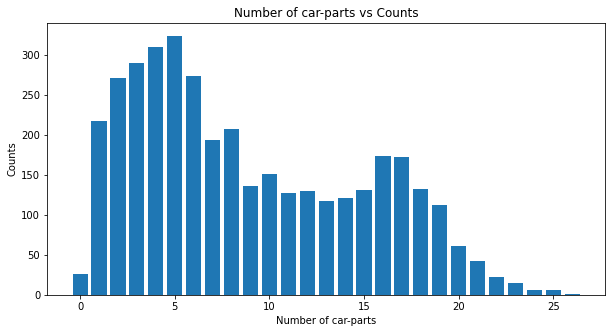

In [62]:
fig = plt.figure(figsize = (10, 5)) 

num_hist=df['num'].value_counts().sort_index()
plt.bar(num_hist.index.tolist(), num_hist.values.tolist()) 
plt.xlabel("Number of car-parts") 
plt.ylabel("Counts") 
plt.title("Number of car-parts vs Counts") 
plt.show() 

In [63]:
num_hist.values

array([ 26, 217, 271, 290, 310, 324, 274, 194, 208, 136, 151, 127, 130,
       118, 121, 131, 174, 173, 133, 113,  61,  42,  22,  15,   6,   6,
         1])

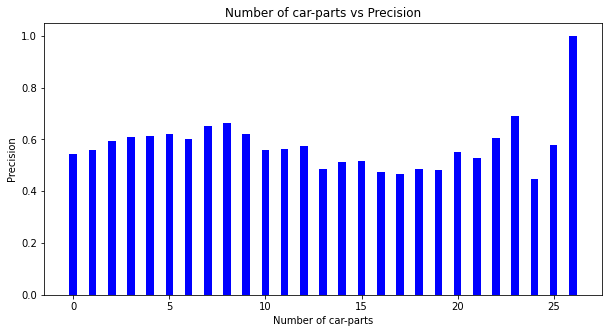

In [64]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_num_parts['num_parts'], result_num_parts['precision'], color ='blue',  
        width = 0.4) 
  
plt.xlabel("Number of car-parts") 
plt.ylabel("Precision") 
plt.title("Number of car-parts vs Precision") 
plt.show() 

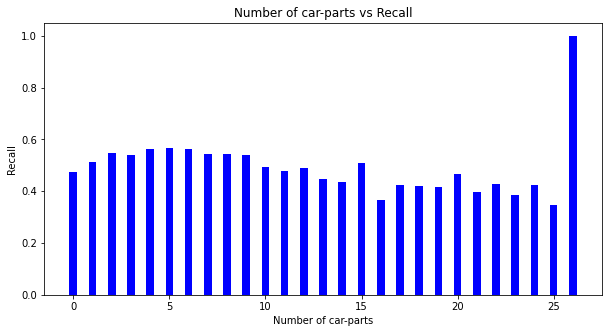

In [65]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_num_parts['num_parts'], result_num_parts['recall'], color ='blue',  
        width = 0.4) 
  
plt.xlabel("Number of car-parts") 
plt.ylabel("Recall") 
plt.title("Number of car-parts vs Recall") 
plt.show() 

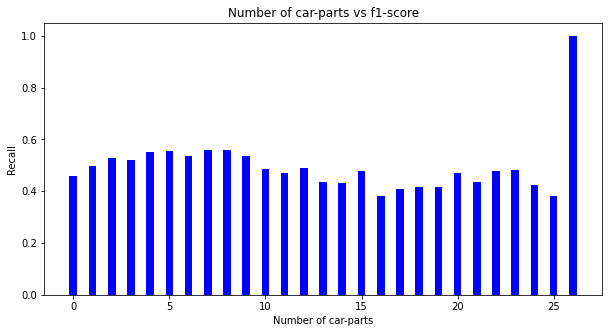

In [66]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(result_num_parts['num_parts'], result_num_parts['f1-score'], color ='blue',  
        width = 0.4) 
  
plt.xlabel("Number of car-parts") 
plt.ylabel("Recall") 
plt.title("Number of car-parts vs f1-score") 
plt.show() 